**Import Library**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd #untuk memproses data, manipulasi data, dan analisis data
import numpy as np #fungsi untuk aljabar linier dan pembuatan bilangan acak
import matplotlib.pyplot as plt #untuk visualisasi data seperti plot, histogram, bar chart, dll
%matplotlib inline
import seaborn as sns #untuk menampilkan visualisasi data lebih menarik
import warnings

#--Sklearn library-- membantu melakukan processing data ataupun melakukan training data
from sklearn.model_selection import train_test_split #membagi data secara acak
from sklearn.metrics import confusion_matrix, classification_report #untuk memplot confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay #untuk memplot confusion matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score #model performance
from sklearn import metrics

#Membangun model ANN
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

warnings.filterwarnings('ignore') # To supress warnings
 # set the background for the graphs
plt.style.use('ggplot')

**Data Understanding**

In [ ]:
# Importing data
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Mining/df_EDA.csv")

In [ ]:
print(f'{df.shape[0]} rows and {df.shape[1]} columns')

495467 rows and 14 columns


In [ ]:
df.head()

,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Airlines,OriginCityName,DestCityName,DepDelay,AirTime,Distance,Month_Str,DayOfWeek_Str,Flight_Status
0,1,2,1,2,2/1/2022,United Airlines,"Charleston, SC","Chicago, IL",-3,111,760,Feb,Tue,0
1,1,2,1,2,2/1/2022,United Airlines,"Aspen, CO","Houston, TX",-3,121,913,Feb,Tue,0
2,1,2,1,2,2/1/2022,United Airlines,"Birmingham, AL","Houston, TX",-1,88,562,Feb,Tue,0
3,1,2,1,2,2/1/2022,United Airlines,"Houston, TX","Palm Springs, CA",-6,199,1269,Feb,Tue,0
4,1,2,1,2,2/1/2022,United Airlines,"Bozeman, MT","Denver, CO",-7,86,524,Feb,Tue,0


In [ ]:
df.tail()

,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Airlines,OriginCityName,DestCityName,DepDelay,AirTime,Distance,Month_Str,DayOfWeek_Str,Flight_Status
495462,1,2,28,1,2/28/2022,United Airlines,"Idaho Falls, ID","Denver, CO",-2,67,458,Feb,Mon,0
495463,1,2,28,1,2/28/2022,United Airlines,"Denver, CO","Durango, CO",-1,53,251,Feb,Mon,0
495464,1,2,28,1,2/28/2022,United Airlines,"Denver, CO","Casper, WY",16,42,230,Feb,Mon,0
495465,1,2,28,1,2/28/2022,United Airlines,"Casper, WY","Denver, CO",7,38,230,Feb,Mon,0
495466,1,2,28,1,2/28/2022,United Airlines,"Denver, CO","Idaho Falls, ID",-2,75,458,Feb,Mon,0


In [ ]:
print ("Features : \n\n", df.columns.tolist()) #mengetahui nama kolom/fitur

Features : 

 ['Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate', 'Airlines', 'OriginCityName', 'DestCityName', 'DepDelay', 'AirTime', 'Distance', 'Month_Str', 'DayOfWeek_Str', 'Flight_Status']


In [ ]:
print ("Missing values :\n\n", df.isnull().sum().sort_values(ascending=False)) #menghitung nilai null

Missing values :

 Quarter           0
Month             0
DayofMonth        0
DayOfWeek         0
FlightDate        0
Airlines          0
OriginCityName    0
DestCityName      0
DepDelay          0
AirTime           0
Distance          0
Month_Str         0
DayOfWeek_Str     0
Flight_Status     0
dtype: int64


In [ ]:
print ("Unique values :  \n\n", df.nunique())  #menghitung unique values

Unique values :  

 Quarter              1
Month                1
DayofMonth          28
DayOfWeek            7
FlightDate          28
Airlines            10
OriginCityName     361
DestCityName       361
DepDelay          1032
AirTime            614
Distance          1473
Month_Str            1
DayOfWeek_Str        7
Flight_Status        2
dtype: int64


In [ ]:
num_duplicate_rows = df.duplicated().sum()
print("Number of duplicate rows: ", num_duplicate_rows)

Number of duplicate rows:  3674


In [ ]:
df.drop_duplicates(inplace=True)
df

,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Airlines,OriginCityName,DestCityName,DepDelay,AirTime,Distance,Month_Str,DayOfWeek_Str,Flight_Status
0,1,2,1,2,2/1/2022,United Airlines,"Charleston, SC","Chicago, IL",-3,111,760,Feb,Tue,0
1,1,2,1,2,2/1/2022,United Airlines,"Aspen, CO","Houston, TX",-3,121,913,Feb,Tue,0
2,1,2,1,2,2/1/2022,United Airlines,"Birmingham, AL","Houston, TX",-1,88,562,Feb,Tue,0
3,1,2,1,2,2/1/2022,United Airlines,"Houston, TX","Palm Springs, CA",-6,199,1269,Feb,Tue,0
4,1,2,1,2,2/1/2022,United Airlines,"Bozeman, MT","Denver, CO",-7,86,524,Feb,Tue,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495462,1,2,28,1,2/28/2022,United Airlines,"Idaho Falls, ID","Denver, CO",-2,67,458,Feb,Mon,0
495463,1,2,28,1,2/28/2022,United Airlines,"Denver, CO","Durango, CO",-1,53,251,Feb,Mon,0
495464,1,2,28,1,2/28/2022,United Airlines,"Denver, CO","Casper, WY",16,42,230,Feb,Mon,0
495465,1,2,28,1,2/28/2022,United Airlines,"Casper, WY","Denver, CO",7,38,230,Feb,Mon,0


In [ ]:
num_duplicate_rows = df.duplicated().sum() #menghitung data yang duplikat
print("Number of duplicate rows: ", num_duplicate_rows)

Number of duplicate rows:  0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491793 entries, 0 to 495466
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Quarter         491793 non-null  int64 
 1   Month           491793 non-null  int64 
 2   DayofMonth      491793 non-null  int64 
 3   DayOfWeek       491793 non-null  int64 
 4   FlightDate      491793 non-null  object
 5   Airlines        491793 non-null  object
 6   OriginCityName  491793 non-null  object
 7   DestCityName    491793 non-null  object
 8   DepDelay        491793 non-null  int64 
 9   AirTime         491793 non-null  int64 
 10  Distance        491793 non-null  int64 
 11  Month_Str       491793 non-null  object
 12  DayOfWeek_Str   491793 non-null  object
 13  Flight_Status   491793 non-null  int64 
dtypes: int64(8), object(6)
memory usage: 56.3+ MB


In [ ]:
target='Flight_Status'
numfeat, catfeat = list(df.select_dtypes(include=np.number)), list(df.select_dtypes(exclude=np.number)); numfeat.remove(target)
df

,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Airlines,OriginCityName,DestCityName,DepDelay,AirTime,Distance,Month_Str,DayOfWeek_Str,Flight_Status
0,1,2,1,2,2/1/2022,United Airlines,"Charleston, SC","Chicago, IL",-3,111,760,Feb,Tue,0
1,1,2,1,2,2/1/2022,United Airlines,"Aspen, CO","Houston, TX",-3,121,913,Feb,Tue,0
2,1,2,1,2,2/1/2022,United Airlines,"Birmingham, AL","Houston, TX",-1,88,562,Feb,Tue,0
3,1,2,1,2,2/1/2022,United Airlines,"Houston, TX","Palm Springs, CA",-6,199,1269,Feb,Tue,0
4,1,2,1,2,2/1/2022,United Airlines,"Bozeman, MT","Denver, CO",-7,86,524,Feb,Tue,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495462,1,2,28,1,2/28/2022,United Airlines,"Idaho Falls, ID","Denver, CO",-2,67,458,Feb,Mon,0
495463,1,2,28,1,2/28/2022,United Airlines,"Denver, CO","Durango, CO",-1,53,251,Feb,Mon,0
495464,1,2,28,1,2/28/2022,United Airlines,"Denver, CO","Casper, WY",16,42,230,Feb,Mon,0
495465,1,2,28,1,2/28/2022,United Airlines,"Casper, WY","Denver, CO",7,38,230,Feb,Mon,0


In [ ]:
numfeat

['Quarter',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'DepDelay',
 'AirTime',
 'Distance']

In [ ]:
catfeat

['FlightDate',
 'Airlines',
 'OriginCityName',
 'DestCityName',
 'Month_Str',
 'DayOfWeek_Str']

**Data Analysis**

In [ ]:
df.describe()

,Quarter,Month,DayofMonth,DayOfWeek,DepDelay,AirTime,Distance,Flight_Status
count,491793.0,491793.0,491793.000000,491793.000000,491793.000000,491793.000000,491793.000000,491793.000000
mean,1.0,2.0,14.858906,3.965768,11.360619,112.215971,803.287298,0.190958
std,0.0,0.0,7.979054,2.026665,51.727175,70.285127,591.022406,0.393057
min,1.0,2.0,1.000000,1.000000,-78.000000,8.000000,31.000000,0.000000
25%,1.0,2.0,8.000000,2.000000,-5.000000,60.000000,369.000000,0.000000
50%,1.0,2.0,15.000000,4.000000,-2.000000,95.000000,651.000000,0.000000
75%,1.0,2.0,22.000000,6.000000,8.000000,142.000000,1046.000000,0.000000
max,1.0,2.0,28.000000,7.000000,2545.000000,668.000000,5095.000000,1.000000


In [ ]:
#korelasi dengan Flight_Status
corr=df.corr()
corr.sort_values(by=["Flight_Status"],ascending=False).iloc[0].sort_values(ascending=False)

Flight_Status    1.000000
DepDelay         0.505847
DayofMonth       0.070686
DayOfWeek        0.052910
AirTime          0.033003
Distance         0.016588
Quarter               NaN
Month                 NaN
Name: Flight_Status, dtype: float64

**Data Preparation**

In [ ]:
dfmodel = df.sample(frac=0.01)

In [ ]:
print ("Unique values top_cities :  \n\n", dfmodel.nunique())  #menghitung unique values

Unique values top_cities :  

 Quarter              1
Month                1
DayofMonth          28
DayOfWeek            7
FlightDate          28
Airlines            10
OriginCityName     268
DestCityName       266
DepDelay           230
AirTime            350
Distance          1094
Month_Str            1
DayOfWeek_Str        7
Flight_Status        2
dtype: int64


In [ ]:
dfmodel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4918 entries, 333483 to 271790
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Quarter         4918 non-null   int64 
 1   Month           4918 non-null   int64 
 2   DayofMonth      4918 non-null   int64 
 3   DayOfWeek       4918 non-null   int64 
 4   FlightDate      4918 non-null   object
 5   Airlines        4918 non-null   object
 6   OriginCityName  4918 non-null   object
 7   DestCityName    4918 non-null   object
 8   DepDelay        4918 non-null   int64 
 9   AirTime         4918 non-null   int64 
 10  Distance        4918 non-null   int64 
 11  Month_Str       4918 non-null   object
 12  DayOfWeek_Str   4918 non-null   object
 13  Flight_Status   4918 non-null   int64 
dtypes: int64(8), object(6)
memory usage: 576.3+ KB


In [ ]:
print(f'{dfmodel.shape[0]} rows and {dfmodel.shape[1]} columns')

4918 rows and 14 columns


In [ ]:
print ("Features : \n\n", df.columns.tolist()) #mengetahui nama kolom/fitur

Features : 

 ['Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate', 'Airlines', 'OriginCityName', 'DestCityName', 'DepDelay', 'AirTime', 'Distance', 'Month_Str', 'DayOfWeek_Str', 'Flight_Status']


In [ ]:
dfmodel = dfmodel.drop(['Quarter', 'Month', 'FlightDate', 'Airlines', 'OriginCityName', 'DestCityName', 'Month_Str', 'DayOfWeek_Str'], axis=1)
dfmodel

,DayofMonth,DayOfWeek,DepDelay,AirTime,Distance,Flight_Status
333483,20,7,4,72,570,0
484368,28,1,-5,104,692,0
294134,17,4,216,110,605,1
232914,14,1,-1,60,304,0
232073,14,1,-1,213,1927,0
...,...,...,...,...,...,...
314783,19,6,111,36,196,1
182755,11,5,0,56,235,0
399308,23,3,-5,93,607,0
20666,2,3,-1,104,822,0


In [ ]:
dfmodel.columns

Index(['DayofMonth', 'DayOfWeek', 'DepDelay', 'AirTime', 'Distance',
       'Flight_Status'],
      dtype='object')

In [ ]:
print(f'{dfmodel.shape[0]} rows and {dfmodel.shape[1]} columns')

4918 rows and 6 columns


In [ ]:
# Make scaling data method
def scaling_check(data):

    case_count = dfmodel['Flight_Status'].value_counts()
    print('Legend:')
    print(case_count)

    plt.figure(figsize=(10,6))
    sns.barplot(x=case_count.index, y=case_count.values)
    plt.rcParams["figure.facecolor"] = "lightblue"
    plt.title('Data Distribution', fontsize=16)
    plt.xlabel('Flight Status', fontsize=12)
    plt.ylabel('Number of Flights', fontsize=12)
    plt.xticks(range(len(case_count.index)), ['On Time (0)', 'Delayed (1)'])
    plt.show()

Legend:
0    4012
1     906
Name: Flight_Status, dtype: int64


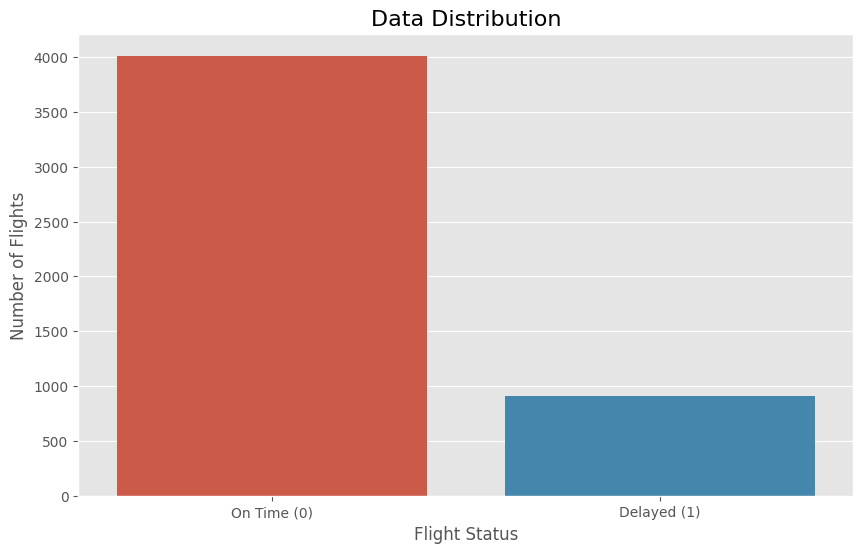

In [ ]:
# Checking scaling data from Dataframe "dfmodel"
scaling_check(dfmodel)

**Building Model**

In [ ]:
#menentukan variabel
X = np.array(dfmodel.drop(['Flight_Status'], axis=1))
y = np.array(dfmodel['Flight_Status'])

In [ ]:
X.shape

(4918, 5)

In [ ]:
y.shape

(4918,)

In [ ]:
X_train, X_test,y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
print('X_train', X_train.shape)
print('X_test', X_test.shape)

X_train (3934, 5)
X_test (984, 5)


**TensorFlow**

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=64, input_shape=(5,), activation="relu"))
model.add(tf.keras.layers.Dense(units=32, activation="relu"))
model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(0.001), metrics=['acc'])

In [ ]:
history=model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)
model.summary()

Epoch 1/100
99/99 [==============================] - 2s 4ms/step - loss: 12.6241 - acc: 0.7455 - val_loss: 0.3731 - val_acc: 0.8996
Epoch 2/100
99/99 [==============================] - 0s 3ms/step - loss: 0.3419 - acc: 0.9091 - val_loss: 0.4784 - val_acc: 0.8030
Epoch 3/100
99/99 [==============================] - 0s 2ms/step - loss: 0.4078 - acc: 0.8961 - val_loss: 0.2837 - val_acc: 0.9009
Epoch 4/100
99/99 [==============================] - 0s 2ms/step - loss: 0.3978 - acc: 0.8977 - val_loss: 0.5282 - val_acc: 0.8030
Epoch 5/100
99/99 [==============================] - 0s 2ms/step - loss: 0.3788 - acc: 0.8993 - val_loss: 0.2599 - val_acc: 0.9225
Epoch 6/100
99/99 [==============================] - 0s 2ms/step - loss: 0.3600 - acc: 0.9078 - val_loss: 0.5353 - val_acc: 0.9072
Epoch 7/100
99/99 [==============================] - 0s 2ms/step - loss: 0.4569 - acc: 0.8939 - val_loss: 0.3326 - val_acc: 0.8831
Epoch 8/100
99/99 [==============================] - 0s 2ms/step - loss: 0.3677 - 

In [ ]:
# Evaluasi model
loss, accuracy = model.evaluate(X_train, y_train)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# list all data in history
print(history.history.keys())

123/123 [==============================] - 0s 994us/step - loss: 0.2405 - acc: 0.9138
Loss: 0.24045750498771667, Accuracy: 0.9138281941413879
dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


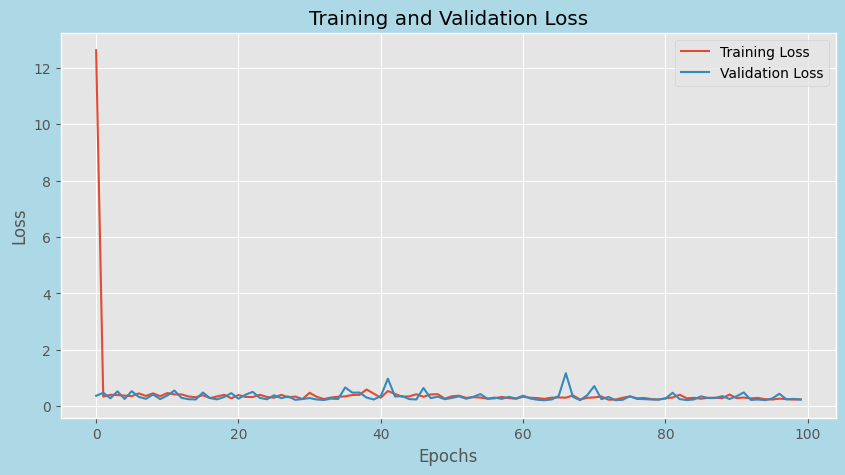

In [ ]:
# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

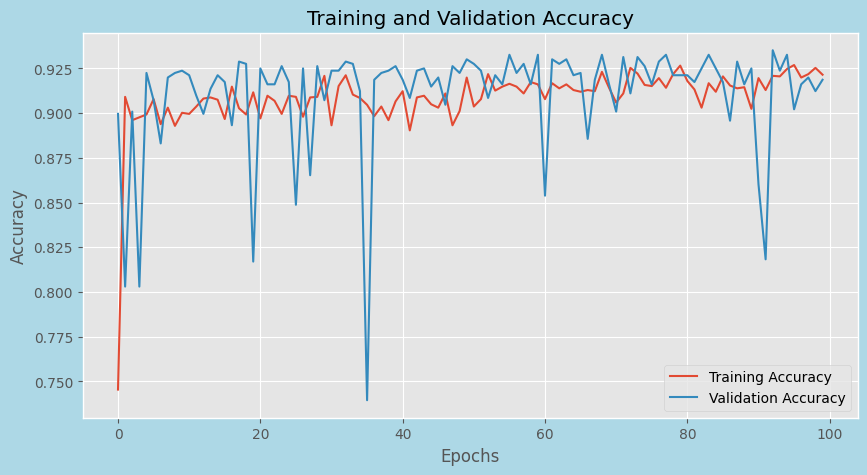

In [ ]:
# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# make class predictions with the model
predictions = (model.predict(X_test) > 0.5).astype(int)
# summarize the first 5 cases
for i in range(5):
 print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

31/31 [==============================] - 0s 820us/step
[20, 7, 4, 72, 570] => 0 (expected 0)
[28, 1, -5, 104, 692] => 0 (expected 0)
[17, 4, 216, 110, 605] => 0 (expected 1)
[14, 1, -1, 60, 304] => 0 (expected 0)
[14, 1, -1, 213, 1927] => 0 (expected 0)


In [ ]:
predictions.shape

(984, 1)

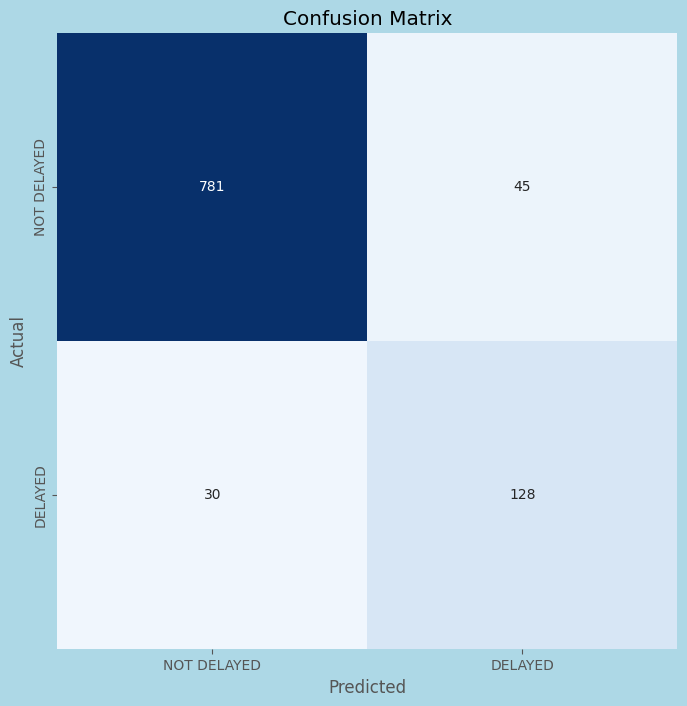

Classification Report:
----------------------
               precision    recall  f1-score   support

 NOT DELAYED       0.96      0.95      0.95       826
     DELAYED       0.74      0.81      0.77       158

    accuracy                           0.92       984
   macro avg       0.85      0.88      0.86       984
weighted avg       0.93      0.92      0.93       984



In [ ]:
cm = confusion_matrix(y_test, predictions)
clr = classification_report(y_test, predictions, target_names=["NOT DELAYED", "DELAYED"])

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)
plt.xticks(np.arange(2) + 0.5, ["NOT DELAYED", "DELAYED"])
plt.yticks(np.arange(2) + 0.5, ["NOT DELAYED", "DELAYED"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

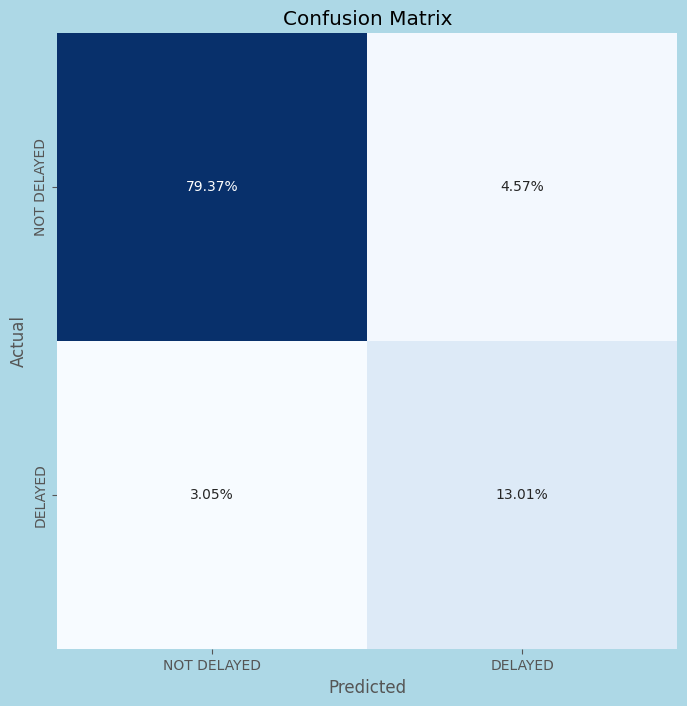

Classification Report:
----------------------
               precision    recall  f1-score   support

 NOT DELAYED       0.96      0.95      0.95       826
     DELAYED       0.74      0.81      0.77       158

    accuracy                           0.92       984
   macro avg       0.85      0.88      0.86       984
weighted avg       0.93      0.92      0.93       984



In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues', cbar=False)
plt.xticks(np.arange(2) + 0.5, ["NOT DELAYED", "DELAYED"])
plt.yticks(np.arange(2) + 0.5, ["NOT DELAYED", "DELAYED"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)